In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# Load dataset again (same structure as training data)
df = pd.read_csv("KL_Property_Listing.csv")

In [12]:
# Features and target
features = ['Location', 'Rooms', 'Bathrooms', 'Car Parks', 'Built_Type', 'Built_Size']
target = 'Property Type'  # You can change to 'Location' or custom 'Price Category'

X = df[features]
y = df[target]

In [13]:
# Define categorical and numeric features
categorical = ['Location', 'Built_Type']
numerical = ['Rooms', 'Bathrooms', 'Car Parks', 'Built_Size']

In [14]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ],
    remainder='passthrough'  # Keep numerical as-is
)

# Pipeline: Preprocessing + Classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [15]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Fit model
clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
# Evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                     precision    recall  f1-score   support

          Apartment       0.81      0.72      0.77       226
           Bungalow       0.81      0.86      0.83        90
        Condominium       0.91      0.93      0.92      1957
               Flat       0.54      0.61      0.57        23
   Residential Land       0.00      0.00      0.00         3
Semi-detached House       0.48      0.39      0.43        38
 Serviced Residence       0.90      0.92      0.91      1273
 Terrace/Link House       0.72      0.62      0.67       145
          Townhouse       0.63      0.50      0.56        34

           accuracy                           0.89      3789
          macro avg       0.65      0.62      0.63      3789
       weighted avg       0.88      0.89      0.88      3789

Confusion Matrix:
[[ 163    0   41    4    0    0   14    4    0]
 [   0   77    2    0    1    6    0    4    0]
 [  24    1 1814    3    0    0   95   13    7]
 [   4    0    1   

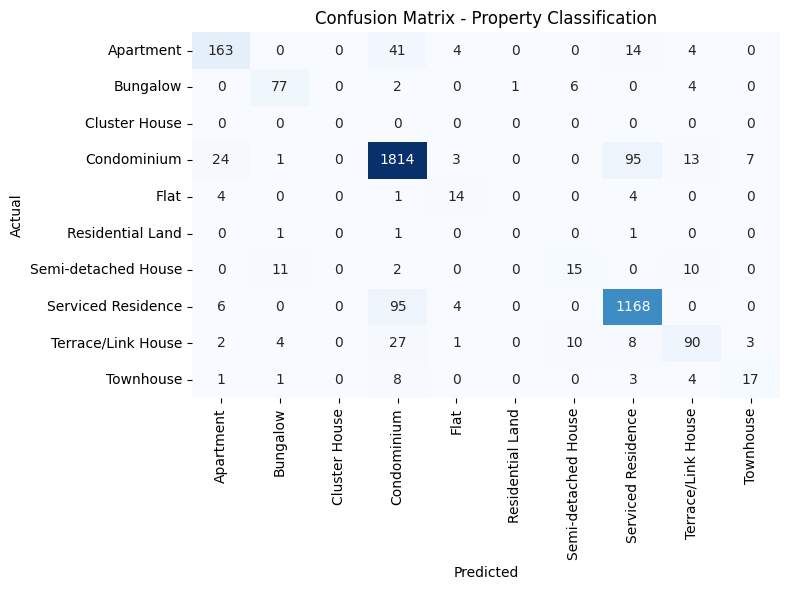

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Property Classification")
plt.tight_layout()
plt.show()


In [19]:
import pickle

with open('Classification_Property.pkl', 'wb') as file:
    pickle.dump(model, file)

NameError: name 'model' is not defined